In [87]:
import pandas as pd
from sklearn import tree
import pydotplus 
from IPython.display import Image
from sklearn import cross_validation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
credit_data = pd.read_csv("german.data-numeric.txt",header=-1,sep='\\s+')
credit_data.head()

0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  19  20  21  22  \
0   1   6   4  12   5   5   3   4   1  67 ...   0   0   1   0   0   1   0   0   
1   2  48   2  60   1   3   2   2   1  22 ...   0   0   1   0   0   1   0   0   
2   4  12   4  21   1   4   3   3   1  49 ...   0   0   1   0   0   1   0   1   
3   1  42   2  79   1   4   3   4   2  45 ...   0   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53 ...   1   0   1   0   0   0   0   0   

   23  24  
0   1   1  
1   1   2  
2   0   1  
3   1   1  
4   1   2  

[5 rows x 25 columns]

In [41]:
target = credit_data[24]
props = credit_data.iloc[:,0:24]

In [104]:
model = tree.DecisionTreeClassifier()
model.fit(props,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

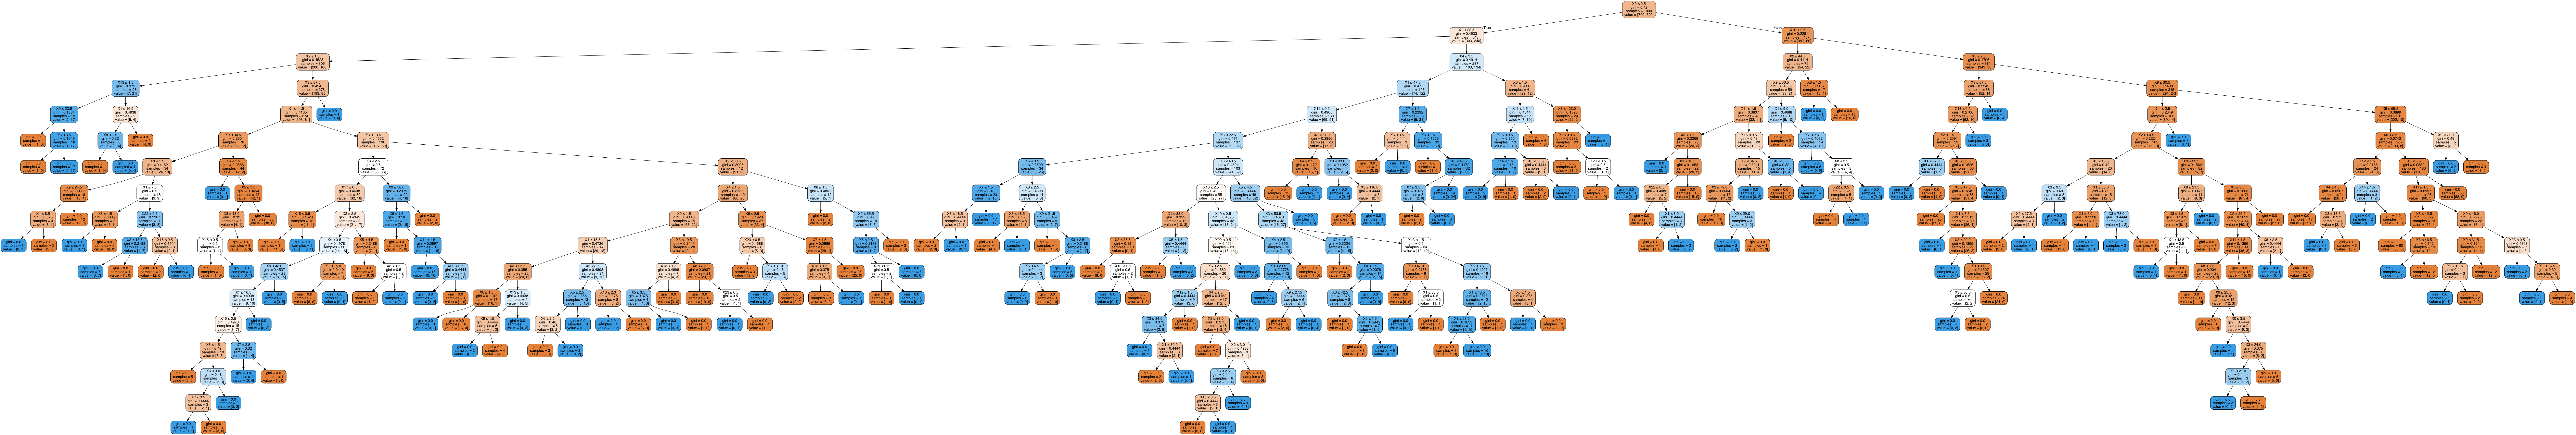

In [68]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
img = Image(graph.create_png())
img

In [66]:
f = open('graph1.png', 'wb')
f.write(graph.create_png())
f.close()

In [101]:
scores = []
depths = np.arange(2,100)
for tree_depth in depths:
    model = tree.DecisionTreeClassifier(max_depth=tree_depth)
    scores.append(cross_validation.cross_val_score(model,props,target).mean())
    model.fit(props,target)

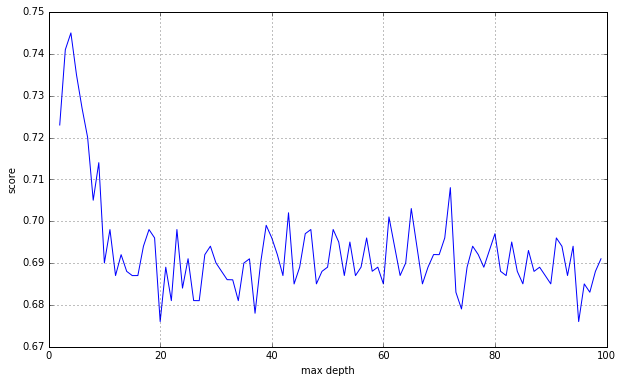

In [98]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('max depth')
plt.ylabel('score')
plt.plot(depths,scores)
plt.show()

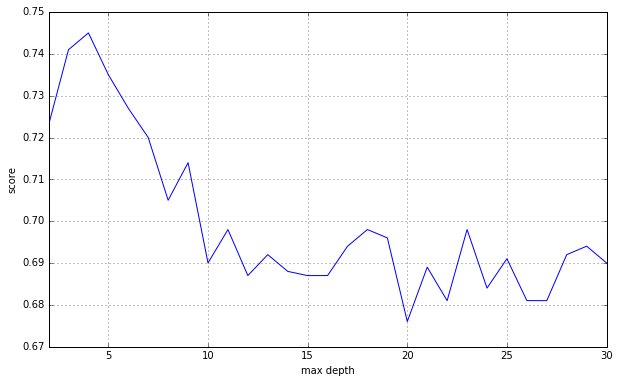

In [100]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('max depth')
plt.ylabel('score')
plt.xlim(2,30)
plt.plot(depths,scores)
plt.show()